Title: **Assignment 2 - COSC3013 Computational Machine Learning - End-to-end Machine Learning Project**

Student ID: **S3979613**

Student Name and email (contact info): **Dao Sy Trung Kien - S3979613@rmit.edu.vn**

Affiliations: **RMIT University Vietnam.**

Date of Report: 03/08/2023

I certify that this is all my own original work. If I took any parts from elsewhere, then they were non-essential parts of the assignment, and they are clearly attributed in my submission.  I will show I agree to this honor code by typing "Yes": Yes.

Please start your report here. 

### Required Libraries and Utilities

In [5]:
# Importing packages - Pandas, Numpy, Seaborn, Scipy
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy import stats
np.random.seed(0)

# Import packages for data modeling and evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

# Impport packages for over sampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

### Import data and check for null values.

In [100]:
# Code for import data from UCI_data csv file
df_train = pd.read_csv(r'C:\Users\Kien\Downloads\Computational ML\UCI-electricity\UCI-electricity\UCI_data.csv')

In [101]:
# Calculating the Missing Values % contribution in Train Data
df_train_null = round(100*(df_train.isnull().sum())/len(df_train), 2)
df_train_null

date             0.0
T1               0.0
RH_1             0.0
T2               0.0
RH_2             0.0
T3               0.0
RH_3             0.0
T4               0.0
RH_4             0.0
T5               0.0
RH_5             0.0
T6               0.0
RH_6             0.0
T7               0.0
RH_7             0.0
T8               0.0
RH_8             0.0
T9               0.0
RH_9             0.0
T_out            0.0
Press_mm_hg      0.0
RH_out           0.0
Windspeed        0.0
Visibility       0.0
Tdewpoint        0.0
rv1              0.0
rv2              0.0
TARGET_energy    0.0
dtype: float64

### Basic Data Exploration.

In [102]:
# Check the dimensions of the Training dataset
print(df_train.shape)

(19735, 28)


In [103]:
# Get info of the dataframe columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19735 non-null  object 
 1   T1             19735 non-null  float64
 2   RH_1           19735 non-null  float64
 3   T2             19735 non-null  float64
 4   RH_2           19735 non-null  float64
 5   T3             19735 non-null  float64
 6   RH_3           19735 non-null  float64
 7   T4             19735 non-null  float64
 8   RH_4           19735 non-null  float64
 9   T5             19735 non-null  float64
 10  RH_5           19735 non-null  float64
 11  T6             19735 non-null  float64
 12  RH_6           19735 non-null  float64
 13  T7             19735 non-null  float64
 14  RH_7           19735 non-null  float64
 15  T8             19735 non-null  float64
 16  RH_8           19735 non-null  float64
 17  T9             19735 non-null  float64
 18  RH_9  

In [104]:
# Five point summary of numerical attributes
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000
T5,19735.0,19.592106,1.844623,15.330000,18.277500,19.390000,20.619643,25.795000
RH_5,19735.0,50.949283,9.022034,29.815000,45.400000,49.090000,53.663333,96.321667


### Data Pre-processing.

In [105]:
# Define the filterd dataframe
df_train_filtered = df_train.drop(['date'], axis=1)

# Calculate Z-scores for each column
z_scores = stats.zscore(df_train_filtered.select_dtypes(include=[float, int]))

# Calculate Z-scores for each numerical feature
z_scores = np.abs(stats.zscore(df_train_filtered))
outliers = np.where(z_scores > 3)

# Calculate IQR (measure of data statistical dispersion) for each numerical feature
Q1 = df_train_filtered.quantile(0.25)
Q3 = df_train_filtered.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for feature in df_train_filtered:
    lower_cap = Q1[feature] - 1.5 * IQR[feature]
    upper_cap = Q3[feature] + 1.5 * IQR[feature]
    df_train_filtered[feature] = np.where(df_train_filtered[feature] < lower_cap, lower_cap, df_train_filtered[feature])
    df_train_filtered[feature] = np.where(df_train_filtered[feature] > upper_cap, upper_cap, df_train_filtered[feature])

In [106]:
# Add date column for further analysis
df_train_filtered.loc[:, "date"] = df_train['date']

In [107]:
df_train_filtered

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,date
0,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,62.166667,...,9.700000,766.100000,65.500000,3.500000,40.000000,3.350000,24.061869,24.061869,60.0,2016-04-19 20:30:00
1,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,43.560000,...,0.300000,740.333333,99.000000,1.000000,41.333333,0.100000,4.622052,4.622052,50.0,2016-03-05 04:40:00
2,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,46.126667,...,4.400000,768.466667,72.000000,6.000000,22.666667,-0.266667,5.635898,5.635898,80.0,2016-03-14 12:40:00
3,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,47.700000,...,3.350000,760.600000,82.000000,5.500000,41.000000,0.500000,49.216445,49.216445,40.0,2016-01-22 15:30:00
4,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,50.745000,...,3.200000,738.900000,88.000000,7.333333,56.000000,1.400000,47.617579,47.617579,60.0,2016-02-10 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,20.100000,44.900000,19.390000,44.172500,19.700000,44.000000,19.066667,46.466667,17.611111,56.433333,...,10.300000,757.350000,80.500000,10.000000,34.500000,7.000000,2.233453,2.233453,40.0,2016-01-27 06:30:00
19731,21.390000,41.090000,19.230000,44.633333,22.790000,38.030000,22.533333,39.360000,20.390000,44.590000,...,4.116667,754.300000,100.000000,1.000000,33.000000,4.116667,18.511994,18.511994,100.0,2016-04-14 08:50:00
19732,20.890000,36.500000,18.000000,40.230000,22.133333,34.433333,20.700000,34.612000,20.000000,42.560000,...,4.000000,754.850000,90.000000,3.000000,25.500000,2.450000,6.176545,6.176545,70.0,2016-04-25 08:30:00
19733,20.790000,36.700000,18.790000,38.245000,21.000000,38.790000,19.290000,36.117500,18.171429,51.500000,...,3.807143,740.573810,91.238095,7.285714,56.500000,2.454762,4.780297,4.780297,50.0,2016-03-04 06:50:00


In [108]:
# Calculate the median of the Windspeed column
median_windspeed = df_train_filtered['Windspeed'].median()

# Replace missing values with median
df_train_filtered['Windspeed'].replace(0, median_windspeed, inplace=True)

### Feature Engineering.

In [109]:
# Convert the datetime column to datetime format
df_train_filtered['datetime'] = pd.to_datetime(df_train_filtered['date'])

# Create new columns 'date' and 'time'
df_train_filtered['date'] = df_train_filtered['datetime'].dt.date
df_train_filtered['time'] = df_train_filtered['datetime'].dt.time

# Create new column 'hour'
df_train_filtered['hour'] = df_train_filtered['datetime'].dt.hour

# Create new column 'day_part'
df_train_filtered['day_part'] = pd.cut(df_train_filtered['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Create new columns 'month' and 'season'
df_train_filtered['month'] = df_train_filtered['datetime'].dt.month
df_train_filtered['season'] = df_train_filtered['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')

# Drop the original datetime column
df_train_filtered.drop('datetime', axis=1, inplace=True)

In [110]:
df_train_filtered = df_train_filtered.sort_values(by='date')

In [111]:
# Encode the 'day_part' column
df_train_filtered['day_part_encoded'] = df_train_filtered['day_part'].cat.codes

In [112]:
# Encode the 'season' column
season_to_number = {
    "Spring": 1,
    "Summer": 2,
    "Fall": 3,
    "Winter": 4
}
df_train_filtered['season_encoded'] = df_train_filtered['season'].map(season_to_number)

In [113]:
# Create new columns 'temperature_mean'
temperature_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']
df_train_filtered['temperature_mean'] = df_train_filtered[temperature_columns].mean(axis=1)

In [114]:
# Create new columns 'humidity_mean'
humidity_columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_8', 'RH_9']
df_train_filtered['humidity_mean'] = df_train_filtered[humidity_columns].mean(axis=1)

In [115]:
# Get the accurate daylight (sunrise) based on the time in Belgium
daylight_hours = {
    (12, 1, 2): (9, 16),  # Winter: 9 AM to 4 PM
    (3, 4, 5): (7, 19),   # Spring: 7 AM to 7 PM
    (6, 7, 8): (6, 21),   # Summer: 6 AM to 9 PM
    (9, 10, 11): (7, 18)  # Fall: 7 AM to 6 PM
}

def is_daylight(row):
    month = row['month']
    hour = row['hour']
    for months, hours in daylight_hours.items():
        if month in months:
            return 1 if hours[0] <= hour <= hours[1] else 0

# Apply the function to create the 'daylight' column
df_train_filtered['daylight'] = df_train_filtered.apply(is_daylight, axis=1)

In [116]:
# Create new columns 'weather' and 'weather_encoded'
df_train_filtered['weather'] = df_train_filtered['T_out'].apply(lambda x: 'normal' if x > 5 else 'cold')
df_train_filtered['weather_encoded'] = np.where(df_train_filtered['weather'] == 'normal', 0, 1)

In [117]:
# These 2 attributes did not return any valuable value so I chose to delete it
df_train_filtered.drop(['rv1','rv2'], axis=1, inplace=True)

In [133]:
# Get the difference between the indoor and the outdoor temperature and humidity
df_train_filtered['humidity_diff'] = df_train_filtered['humidity_mean'] - df_train_filtered['RH_out']
df_train_filtered['temperature_diff'] = df_train_filtered['temperature_mean'] - df_train_filtered['T_out']

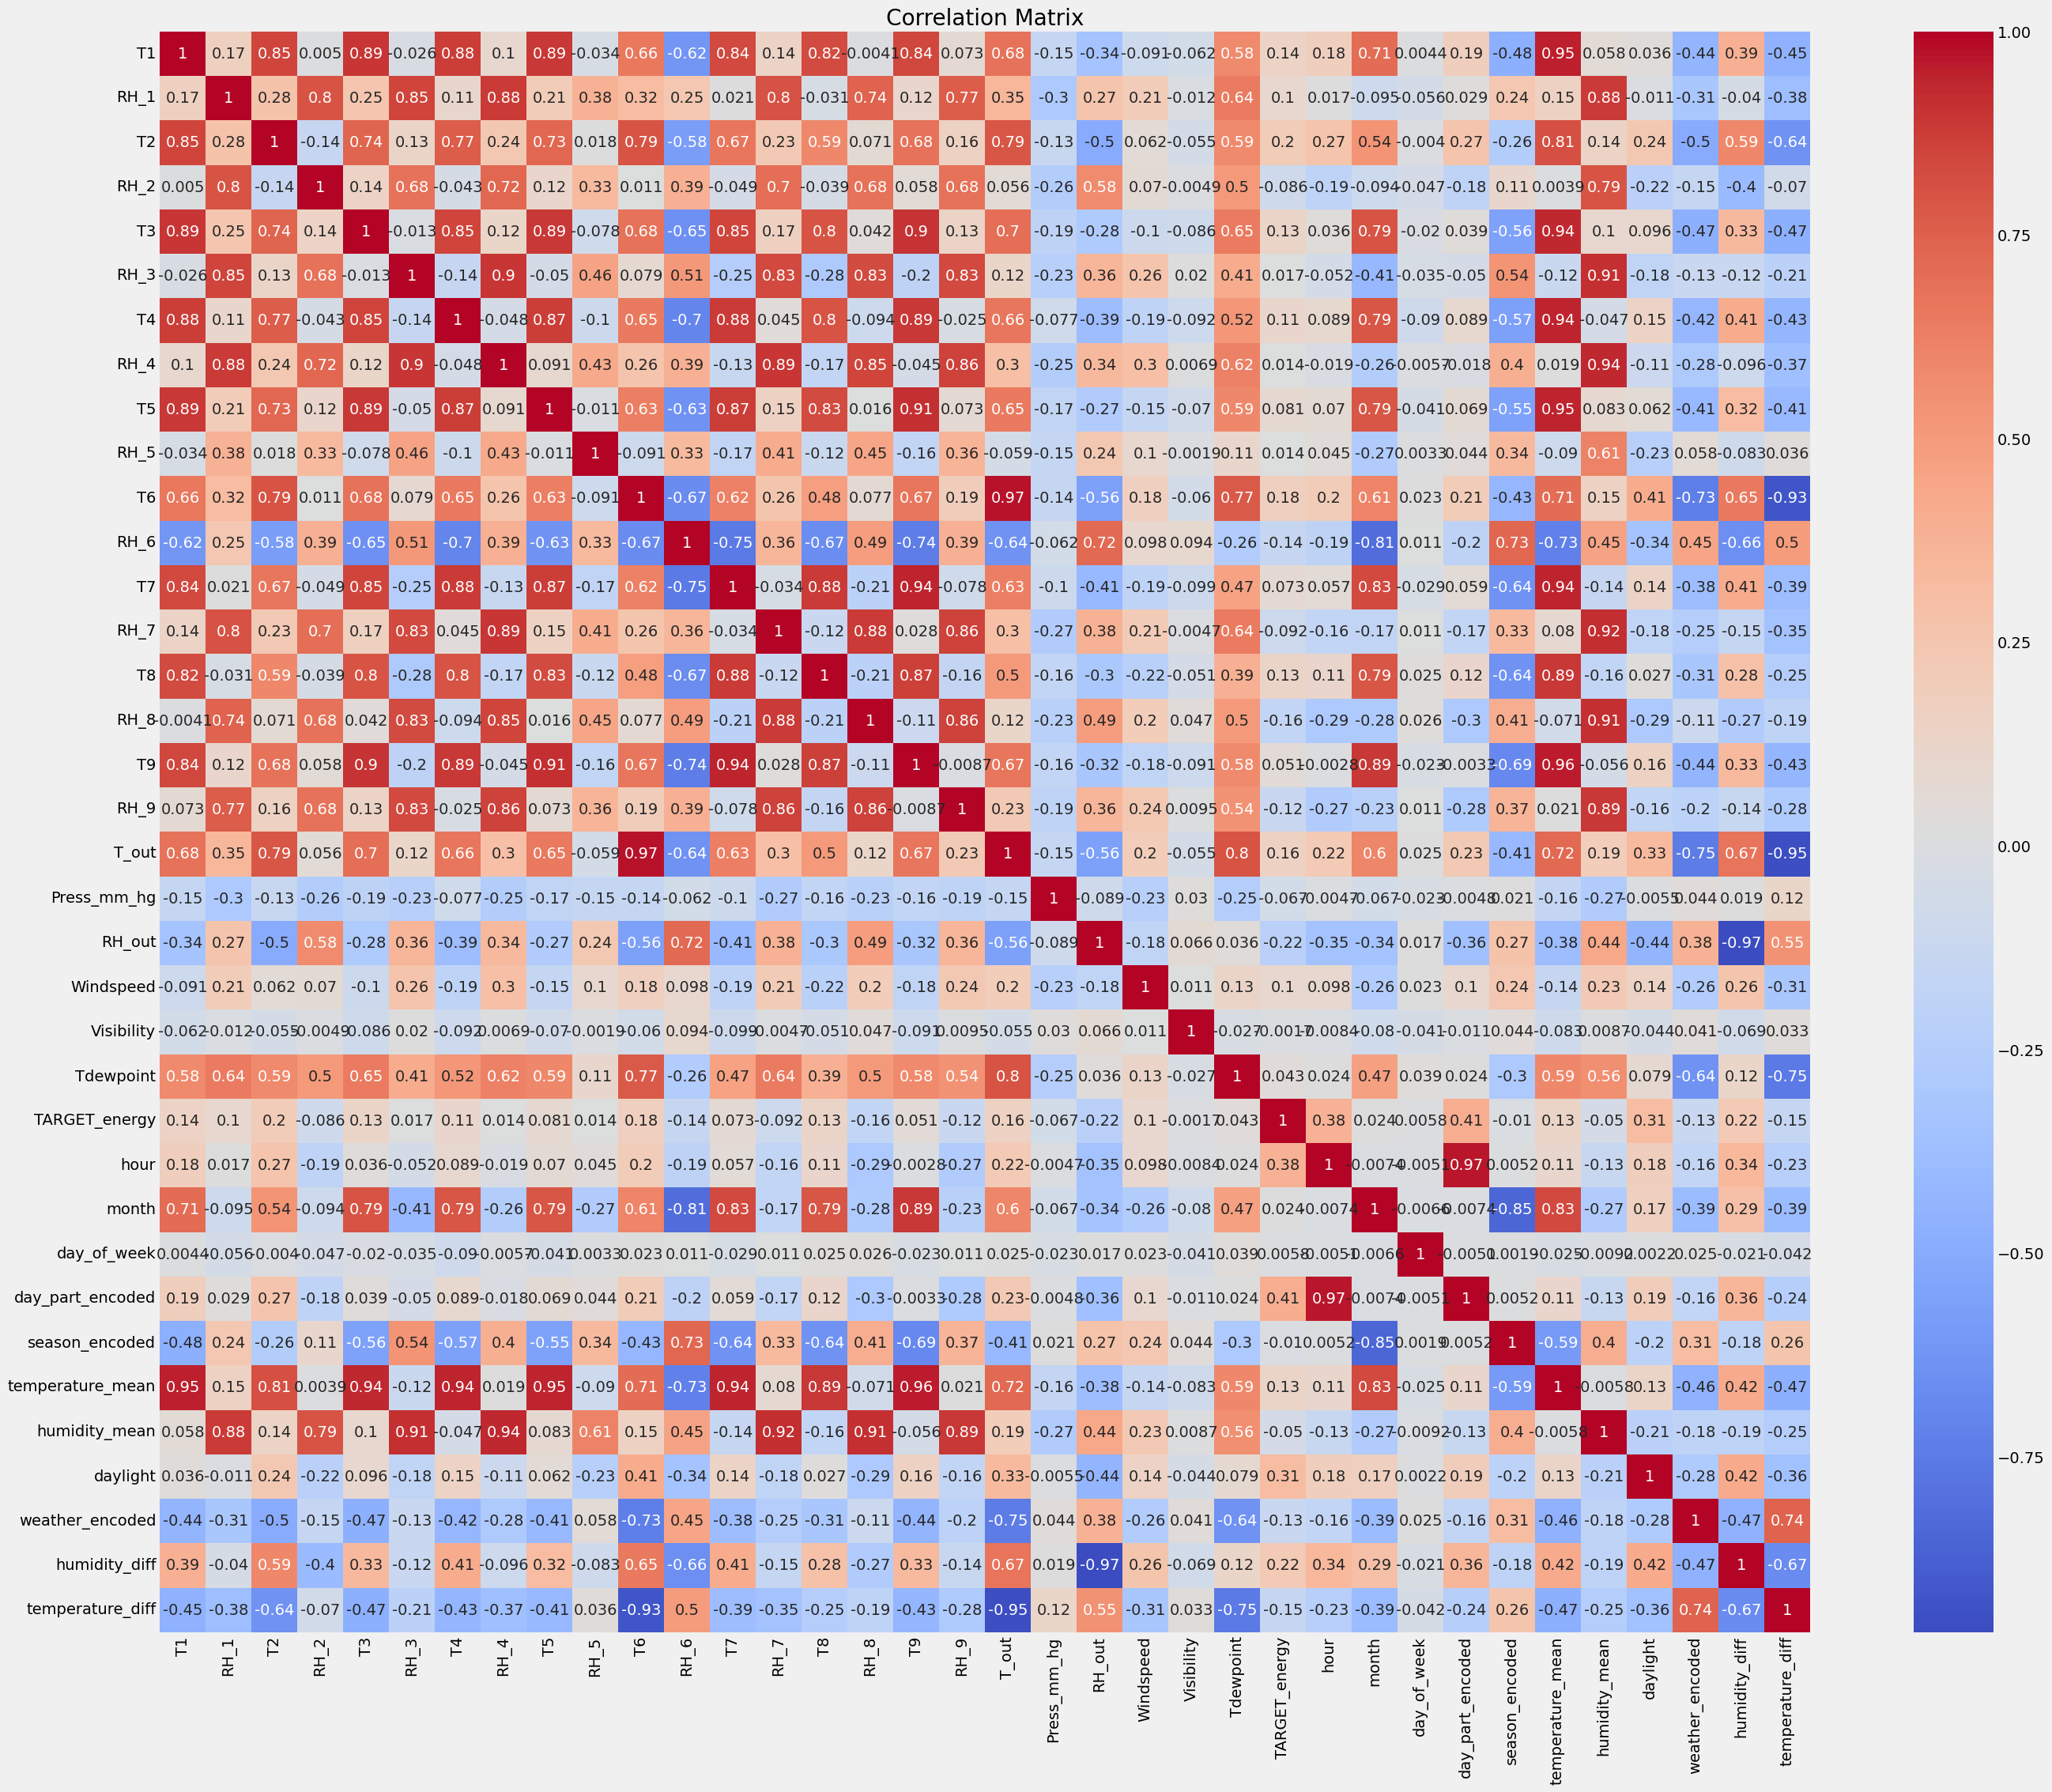

In [119]:
# Correlation Matrix
numeric_df_train = df_train_filtered.select_dtypes(include=[np.number])
plt.figure(figsize=(30, 25))
sns.heatmap(numeric_df_train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Data Modeling

In [125]:
# Feature Selection
X = df_train_filtered[['temperature_mean', 'humidity_mean', 'hour', 'month', 'day_part_encoded', 'daylight', 'season_encoded', 'weather_encoded', 'Windspeed', 'Visibility', 'Tdewpoint','temperature_diff','humidity_diff']]
y = df_train_filtered['TARGET_energy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression model

In [126]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, model.predict(X_train_scaled))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'R^2 Score Train: {r2_train}')

# Create pipeline with standard scaler and apply Liear Regression
pipeline = make_pipeline(StandardScaler(), LinearRegression())
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated MSE: {-cv_scores.mean()}')
print(f'Cross-validated RMSE: {cv_rmse.mean()}')

Mean Squared Error: 1461.44244390392
Root Mean Squared Error: 38.22881693047694
R^2 Score: 0.2421005395476311
R^2 Score Train: 0.24685931366313907
Cross-validated MSE: 1570.2334520812797
Cross-validated RMSE: 39.441007710874814


In [127]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=model, n_features_to_select=6)
rfe.fit(X, y)
print("Feature Ranking: ", rfe.ranking_)

Feature Ranking:  [1 7 1 1 1 1 5 1 3 8 4 2 6]


### Random Forest model

In [128]:
# Train the Random Forest Regressor model 
model = RandomForestRegressor(random_state=0)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, model.predict(X_train_scaled))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'R^2 Score Train: {r2_train}')

# Create pipeline with standard scaler and apply Random Forest Regressor
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0))
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated MSE: {-cv_scores.mean()}')
print(f'Cross-validated RMSE: {cv_rmse.mean()}')

Mean Squared Error: 530.878886590103
Root Mean Squared Error: 23.04080915658352
R^2 Score: 0.7246878771103726
R^2 Score Train: 0.9628490098464263
Cross-validated MSE: 1584.7240774005572
Cross-validated RMSE: 39.596993899347794


### Random Forest model with SMOTE

In [129]:
# Apply SMOTE to the training data with k_neighbors set to 2
smote = SMOTE(sampling_strategy='minority', k_neighbors=2, random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train_resampled, model.predict(X_train_resampled_scaled))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'R^2 Score Train: {r2_train}')

# Create pipeline with standard scaler and apply Random Forest Regressor
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0))
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated MSE: {-cv_scores.mean()}')
print(f'Cross-validated RMSE: {cv_rmse.mean()}')

Mean Squared Error: 1050.307554044925
Root Mean Squared Error: 32.4084488065215
R^2 Score: 0.45531380189473325
R^2 Score Train: 0.9741942938473542
Cross-validated MSE: 1584.7240774005572
Cross-validated RMSE: 39.596993899347794


### Gradient Boosting model

In [130]:
# Train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, model.predict(X_train_scaled))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'R^2 Score Train: {r2_train}')

# Create pipeline with standard scaler and apply Gradient Boosting Regressor
pipeline = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=0))
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated MSE: {-cv_scores.mean()}')
print(f'Cross-validated RMSE: {cv_rmse.mean()}')

Mean Squared Error: 1110.011223008634
Root Mean Squared Error: 33.316830926854884
R^2 Score: 0.4243516667224795
R^2 Score Train: 0.4433895605011856
Cross-validated MSE: 1449.6547137447953
Cross-validated RMSE: 37.910545635003686


### SVR model

In [131]:
# Train the SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, model.predict(X_train_scaled))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'R^2 Score Train: {r2_train}')

# Create pipeline with standard scaler and apply SVR
pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated MSE: {-cv_scores.mean()}')
print(f'Cross-validated RMSE: {cv_rmse.mean()}')

Mean Squared Error: 1453.7767030045438
Root Mean Squared Error: 38.128423820091804
R^2 Score: 0.24607596869698922
R^2 Score Train: 0.25420695298884965
Cross-validated MSE: 1564.5676435583268
Cross-validated RMSE: 39.459085010981084


### XGBRegressor model

In [132]:
# Train and fine-tune the XGBRegressor model
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=0,
    n_estimators=2000,
    learning_rate=0.02,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=1.0,
    gamma=0.3,
    reg_alpha=0.01,
    reg_lambda=2.0,
    min_child_weight=1
)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, model.predict(X_train_scaled))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'R^2 Score Train: {r2_train}')

# Create pipeline with standard scaler and xgboost
pipeline = make_pipeline(StandardScaler(), XGBRegressor(
    objective='reg:squarederror',
    random_state=0,
    n_estimators=2000,
    learning_rate=0.02,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=1.0,
    gamma=0.3,
    reg_alpha=0.01,
    reg_lambda=2.0,
    min_child_weight=1
))
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated MSE: {-cv_scores.mean()}')
print(f'Cross-validated RMSE: {cv_rmse.mean()}')

Mean Squared Error: 549.3387310573111
Root Mean Squared Error: 23.437976257717114
R^2 Score: 0.7151146597591929
R^2 Score Train: 0.9704481880865105
Cross-validated MSE: 1674.1360499115453
Cross-validated RMSE: 40.58979451049824
